# Extracting Image features

In [2]:
# Imports
import os
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import json

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline  

plt.style.use('fivethirtyeight')

In [4]:
def walk_up_folder(path, depth=1):
    """
    Helper method to navigate the file system and get to the file location
    """
    _cur_depth = 1        
    while _cur_depth < depth:
        path = os.path.dirname(path)
        _cur_depth += 1
    return path

In [11]:
data_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_data.json')

with open(data_path, encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

In [14]:
def blank_image():
    """
    Loads a blank image indicating missing file
    """
    return Image.fromarray(np.zeros((200,200,3), dtype="uint8"), 'RGB')

In [140]:
import PIL
from PIL import Image
import requests
from io import BytesIO
import urllib.request
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [112]:
images=[]
for i in range(len(data)):
    url=data[i]['images_url']
    if url.startswith("//"):
        url ="https://"+url[2:]
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        # Making sure all images are of the same dimensions
        if img.size!=(200,200):
            img=img.resize((200, 200), PIL.Image.ANTIALIAS)
        images.append(img)
    except:
        images.append(blank_image())
        continue

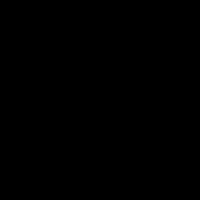

In [55]:
images[287]

In [56]:
img_to_array(images[287]).shape

(200, 200, 3)

In [59]:
img_to_array(images[0]).reshape(-1).reshape(1,3,200,200)

array([[[[ 247.,  247.,  247., ...,  249.,  249.,  249.],
         [ 249.,  249.,  249., ...,   47.,   32.,   85.],
         [  49.,   37.,   84., ...,  249.,  249.,  249.],
         ..., 
         [   0.,    0.,   61., ...,  251.,  251.,  251.],
         [ 250.,  250.,  250., ...,  251.,  251.,  251.],
         [ 251.,  251.,  251., ...,  150.,  132.,   54.]],

        [[   8.,    0.,  117., ...,  251.,  251.,  251.],
         [ 250.,  250.,  250., ...,  251.,  251.,  251.],
         [ 251.,  251.,  251., ...,  155.,  137.,   44.],
         ..., 
         [ 183.,  234.,  197., ...,  226.,  217.,  233.],
         [ 215.,  205.,  228., ...,  251.,  251.,  251.],
         [ 250.,  250.,  250., ...,  178.,  229.,  192.]],

        [[ 184.,  234.,  197., ...,  228.,  220.,  230.],
         [ 212.,  202.,  227., ...,  251.,  251.,  251.],
         [ 250.,  250.,  250., ...,  178.,  228.,  191.],
         ..., 
         [ 248.,  248.,  248., ...,  250.,  255.,  255.],
         [ 251.,  255.,

In [89]:
dataset = np.ndarray(shape=(1000, 3, 200, 200),dtype=np.float32)

In [128]:
print(images[300].size)

(200, 200)


In [131]:
img_to_array(images[330]).shape

(200, 200, 4)

In [125]:
import cv2
cv2.cvtColor(img_to_array(images[330]), cv2.COLOR_BGRA2BGR).shape

(200, 200, 3)

In [107]:
images[19].resize((200, 200), PIL.Image.ANTIALIAS).size

(200, 200)

# Loading the Dataset

In [ ]:
dataset_final = np.ndarray(shape=(1000,200, 200,3),dtype=np.float32)
# Loading the image data
for i in range(len(data)):
    url=data[i]['images_url']
    if url.startswith("//"):
        url ="https://"+url[2:]
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        # Making sure all images are of the same dimensions
        if img.size!=(200,200):
            img=img.resize((200, 200), PIL.Image.ANTIALIAS)
        x = img_to_array(img)
        # In case of grayScale images the len(img.shape) == 2
        if len(x.shape) > 2 and x.shape[2] == 4:
            #convert the image from RGBA2RGB
            x = cv2.cvtColor(x, cv2.COLOR_BGRA2BGR)  
    except:
        x=img_to_array(blank_image())
        pass
    x = (x - 128.0) / 128.0
    print(i,x.shape)
    dataset_final[i]=x
    #dataset[i] = np.rollaxis(x, axis=2, start=0)   # this is a Numpy array with shape (3, 200, 200)

0 (200, 200, 3)
1 (200, 200, 3)
2 (200, 200, 3)
3 (200, 200, 3)
4 (200, 200, 3)
5 (200, 200, 3)
6 (200, 200, 3)
7 (200, 200, 3)
8 (200, 200, 3)
9 (200, 200, 3)
10 (200, 200, 3)
11 (200, 200, 3)
12 (200, 200, 3)
13 (200, 200, 3)
14 (200, 200, 3)
15 (200, 200, 3)
16 (200, 200, 3)
17 (200, 200, 3)
18 (200, 200, 3)
19 (200, 200, 3)
20 (200, 200, 3)
21 (200, 200, 3)
22 (200, 200, 3)
23 (200, 200, 3)
24 (200, 200, 3)
25 (200, 200, 3)
26 (200, 200, 3)
27 (200, 200, 3)
28 (200, 200, 3)
29 (200, 200, 3)
30 (200, 200, 3)
31 (200, 200, 3)
32 (200, 200, 3)
33 (200, 200, 3)
34 (200, 200, 3)
35 (200, 200, 3)
36 (200, 200, 3)
37 (200, 200, 3)
38 (200, 200, 3)
39 (200, 200, 3)
40 (200, 200, 3)
41 (200, 200, 3)
42 (200, 200, 3)
43 (200, 200, 3)
44 (200, 200, 3)
45 (200, 200, 3)
46 (200, 200, 3)
47 (200, 200, 3)
48 (200, 200, 3)
49 (200, 200, 3)
50 (200, 200, 3)
51 (200, 200, 3)
52 (200, 200, 3)
53 (200, 200, 3)
54 (200, 200, 3)
55 (200, 200, 3)
56 (200, 200, 3)
57 (200, 200, 3)
58 (200, 200, 3)
59 (200

In [174]:
dataset.shape

(1000, 3, 200, 200)

In [175]:
dataset[0]

array([[[ 0.9296875,  0.9296875,  0.9296875, ...,  0.9453125,  0.9453125,
          0.9453125],
        [ 0.9296875,  0.9296875,  0.9296875, ...,  0.9453125,  0.9453125,
          0.9453125],
        [ 0.9296875,  0.9296875,  0.9296875, ...,  0.9453125,  0.9453125,
          0.9453125],
        ..., 
        [ 0.9375   ,  0.9375   ,  0.9375   , ...,  0.9375   ,  0.9375   ,
          0.9375   ],
        [ 0.9375   ,  0.9375   ,  0.9375   , ...,  0.9375   ,  0.9375   ,
          0.9375   ],
        [ 0.9375   ,  0.9375   ,  0.9375   , ...,  0.9375   ,  0.9375   ,
          0.9375   ]],

       [[ 0.9296875,  0.9296875,  0.9296875, ...,  0.9453125,  0.9453125,
          0.9453125],
        [ 0.9296875,  0.9296875,  0.9296875, ...,  0.9453125,  0.9453125,
          0.9453125],
        [ 0.9296875,  0.9296875,  0.9296875, ...,  0.9453125,  0.9453125,
          0.9453125],
        ..., 
        [ 0.9375   ,  0.9375   ,  0.9375   , ...,  0.9375   ,  0.9375   ,
          0.9375   ],
        [ 

# Network Architecture

In [152]:
weight_file = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [166]:
import h5py

In [168]:
def get_base_model(weights_path):
    """
    Returns the convolutional part of VGG net as a keras model 
    All layers have trainable set to False
    """
    img_width, img_height = 200, 200

    # build the VGG16 network
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height), name='image_input'))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    # set trainable to false in all layers 
    for layer in model.layers:
        if hasattr(layer, 'trainable'):
            layer.trainable = False
    if weights_path:
            model.load_weights(weights_path)

        
    return model

def load_weights_in_base_model(model):
    """
    The function takes the VGG convolutian part and loads
    the weights from the pre-trained model and then returns the model
    """
    weight_file = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
    f = h5py.File(weight_file)
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
            # we don't look at the last (fully-connected) layers in the savefile
            break
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
        model.layers[k].set_weights(weights)
    f.close()
    return model


In [169]:
model = get_base_model(weight_file)

ValueError: Dimension 0 in both shapes must be equal, but are 3 and 64. Shapes are [3,3,200,64] and [64,3,3,3]. for 'Assign_2' (op: 'Assign') with input shapes: [3,3,200,64], [64,3,3,3].

In [160]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,200,200)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2), dim_ordering="th"))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2), dim_ordering="th"))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2), dim_ordering="th"))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2), dim_ordering="th"))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2), dim_ordering="th"))

    model.add(Flatten())
    #model.add(Dense(4096, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(4096, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [ ]:
model = VGG_16(weight_file)

In [170]:
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input

In [172]:
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (200, 200, 3), classes = 10)

80142336/80134624 [==============================] - 16s 0us/step


In [ ]:
X_train = preprocess_input(dataset_final)

In [ ]:
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)